<a href="https://colab.research.google.com/github/BorisOskolkov/MLcourse/blob/main/asng05/A05_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Made by Boris Oskolkov for Assignment05 (CS5783)

In [14]:
from io import StringIO
import pandas as pd
import math
import numpy as np
from IPython.display import Image
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Let's hardcode our data


In [3]:
FRUITDATA = """
Taste,Farm climate,Visual defects,Size
Meh,Warm,Some,Small
Meh,Cold,None,Large
Meh,Cold,None,Large
Yummy,Cold,Many,Small
Yummy,Warm,Many,Small
Meh,Warm,Some,Large
Yummy,Warm,Many,Large
Yummy,Cold,None,Small
Yummy,Cold,None,Small
Meh,Warm,Some,Large
"""
fruit_data = pd.read_csv(StringIO(FRUITDATA))
fruit_data

,Taste,Farm climate,Visual defects,Size
0,Meh,Warm,Some,Small
1,Meh,Cold,None,Large
2,Meh,Cold,None,Large
3,Yummy,Cold,Many,Small
4,Yummy,Warm,Many,Small
5,Meh,Warm,Some,Large
6,Yummy,Warm,Many,Large
7,Yummy,Cold,None,Small
8,Yummy,Cold,None,Small
9,Meh,Warm,Some,Large


--------------[Question 1]-------------

To calculate initial entropy of the target variable *taste* I will use following formula:

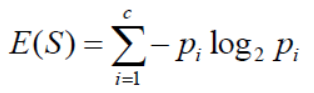

In [4]:
# to calculate pi for every class I will count it:
fruit_data.Taste.value_counts()

Meh      5
Yummy    5
Name: Taste, dtype: int64

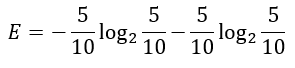

In [15]:
e = -5/10*math.log(0.5,2)-5/10*math.log(0.5,2)
e

1.0

Here is perfect entropy: 1

--------------end of [Question 1]-------------

--------------[Question 2]-------------

To calculate *Visual defects* information gain I will subtract weightet conditious feature entropy from target entropy:

In [6]:
pd.pivot_table(fruit_data.drop(columns=['Farm climate', 'Size']), index="Taste",
                    columns=['Visual defects'], aggfunc="size")

Visual defects,Many,None,Some
Taste,,,
Meh,NaN,2.0,3.0
Yummy,3.0,2.0,NaN


In [7]:
e_taste_many = 0-3/3*math.log(1,2)
e_taste_none = -2/4*math.log(0.5,2)-2/4*math.log(0.5,2)
e_taste_some = 0-3/3*math.log(1,2)

In [8]:
ig = 1 - (3/12)*e_taste_many - (4/12)*e_taste_none - (3/12)*e_taste_some
print(f'Information gain is {ig}')

Information gain is 0.6666666666666667


--------------end of [Question 2]-------------

--------------[Question 3]-------------

In [9]:
e_taste_some

0.0

In [10]:
e_taste_none

1.0

--------------end of [Question 3]-------------

--------------[Question 4]-------------

**TASK**: Implement a naïve version of 
the k-means algorithm based on your understanding. Your code must take the number of clusters k as input 
and  perform  k-means  clustering  on  the  given  image.  Once  the  algorithm  finishes  running,  the  cluster 
centroids represent the top-k common colors in the image. 

In [11]:
import cv2  
img = cv2.imread('/content/drive/MyDrive/input.png') 

Below my own implementation of required function. Main idea is following: I am making random centroids, compute distance to every pixel for every centroid, then assign every pixel to each centroid based on smallest distance (distance here is color). Then I calculate color mean among assingned pixels for every centroid. After that I "move" each centroid to that "average" color. The process is repeating until centroids stop moving significantly (based on my experience after debugging it is enough to stop after 5 iterations, but it can stop early (based on moving distance)). My function shows picture after every such iteration.

In [16]:
def k_means(img, k):
  #init iterations, dimensions, and random centroids (colors)
  iterations = 5
  height, width, channels = np.shape(img)
  centroids = np.random.randint(np.amax(img), size=(k, channels))

  # start iterations
  for it in range(iterations):

    # init null matrices for distance and assigning for every centroid
    centroid_distance = np.zeros((k,width,height,1))
    centroid_assign = np.zeros((k,width,height,1), dtype=int)

    # calculating distances for each centroid
    for i in range(k):
      centroid_distance[i] = np.linalg.norm(centroids[i]-img, axis=2, keepdims = True)

    # assigning each pixel to each centorid by filling assignment matrix
    for i in range(width):  
      for j in range(height):
        distances_to_centroid = np.zeros(k)
        distances_to_centroid = np.array([centroid_distance[n][i][j] for n in range(k)])
        n_of_centroid = np.argmin(distances_to_centroid)
        centroid_assign[n_of_centroid][i][j] = 1

    # init value for new cluster's centroids
    new_place = np.zeros_like(centroids, dtype=int)
    for i in range(k):

      #summing up all pixels in one cluster by color
      mean = np.sum(np.sum(centroid_assign[i]*img, axis=0), axis=0)

      #check if we assign any pixel to cluster
      if np.sum(centroid_assign[i]) != 0:
        # then calculating mean color
        new_place[i] = np.around(mean/np.sum(centroid_assign[i])).astype(int)
      #print(f'assigning {i} centroid {centroids[i]} to {new_place[i]}')

    # storing overall moving distance for th future decision about stopping the function 
    moving_distance =  np.linalg.norm(centroids-new_place) 
    centroids = new_place
    new_picture = np.zeros_like(img, dtype=int)
    for i in range(k):
      new_picture += centroid_assign[i]*centroids[i]

    # Saving the image
    if cv2.imwrite('output.png', new_picture):
      display(Image(filename='output.png'))

    # stop moving centroids since we won't see significant improvement
    if moving_distance <= k*4:
      print(f'Picture "output.png" succesfully saved in the directory' )
      return new_picture
  print(f'Picture "output.png" succesfully saved in the directory' )
  return new_picture


Here you can see exapmle output of my function.

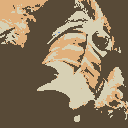

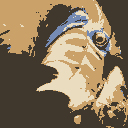

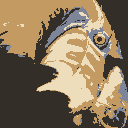

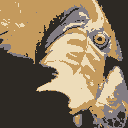

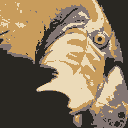

Picture "output.png" succesfully saved in the directory


In [17]:
k_means(img, 4);

--------------end of [Question 4]-------------